In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [0]:
train_info=pd.read_csv("./Data/train_info.tsv", sep='\t') #file train_data

In [8]:
train_info.head()

,ID,title,artist_name,artist_id,composers_name,composers_id,release_time
0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00
1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00
2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00
4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00


In [0]:
test_info = pd.read_csv("./Data/test_info.tsv", sep='\t')

In [10]:
test_info.head()

,ID,title,artist_name,artist_id,composers_name,composers_id,release_time
0,1073994292,Giấc Mơ Mình Em,Minh Tuyết,455,Minh Vy,100019,2017-11-01 18:27:00
1,1074250503,Rồi 30 Năm Qua,Tâm Đoan,518,Nhật Ngân,100218,2017-10-01 22:07:00
2,1074254709,Hòa Bình Hoan Ca,"Hùng Phú, Duy Linh",18241.918,Huy Liêu,430572,2017-11-07 23:47:00
3,1074254735,Chia Tay Ngày Hè,Xuân Trường,11740,Huy Liêu,430572,2017-11-07 23:38:00
4,1074326411,Xin Gọi Nhau Là Cố Nhân,Quang Lê,828,Song Ngọc,100288,2017-10-01 21:33:00


In [0]:
train_rank=pd.read_csv("./Data/train_rank.csv") 

In [12]:
train_rank.head()

,ID,label
0,1073748245,7
1,1073751978,3
2,1073835561,6
3,1073856553,2
4,1073929630,7


In [13]:
#Check the order of songs in these two files 
train_rank['ID']-train_info['ID']

0       0
1       0
2       0
3       0
4       0
       ..
9073    0
9074    0
9075    0
9076    0
9077    0
Name: ID, Length: 9078, dtype: int64

In [0]:
#write the ranks of song into the train_info dataframe
train_info["label"]=train_rank["label"]

In [15]:
train_info.head()

,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label
0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7
1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3
2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2
4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7


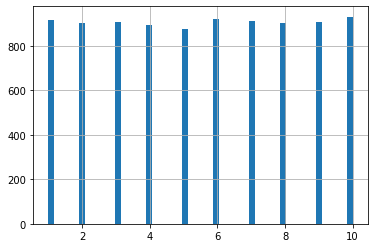

In [16]:
# plot the number of songs on each rank
train_info["label"].hist(bins=50)

In [0]:
import re
# extract number and text 
def extract_num(text):
  return re.findall(r'\w[\w]+', text)

def extract_text(text):
  new_text=text.split("(")[0].strip()
  new_text.replace("Remix","")
  return new_text.strip()

In [0]:
list_titles = [extract_text(title) for title in train_info["title"]]
list_artists = train_info["artist_name"]
list_composers = train_info["composers_name"]

TOP 5 MOST COMMON SONGS : 
Đắp Mộ Cuộc Tình 36
Lại Nhớ Người Yêu 32
Đoạn Tuyệt 32
Con Đường Xưa Em Đi 29
Cát Bụi Cuộc Đời 25


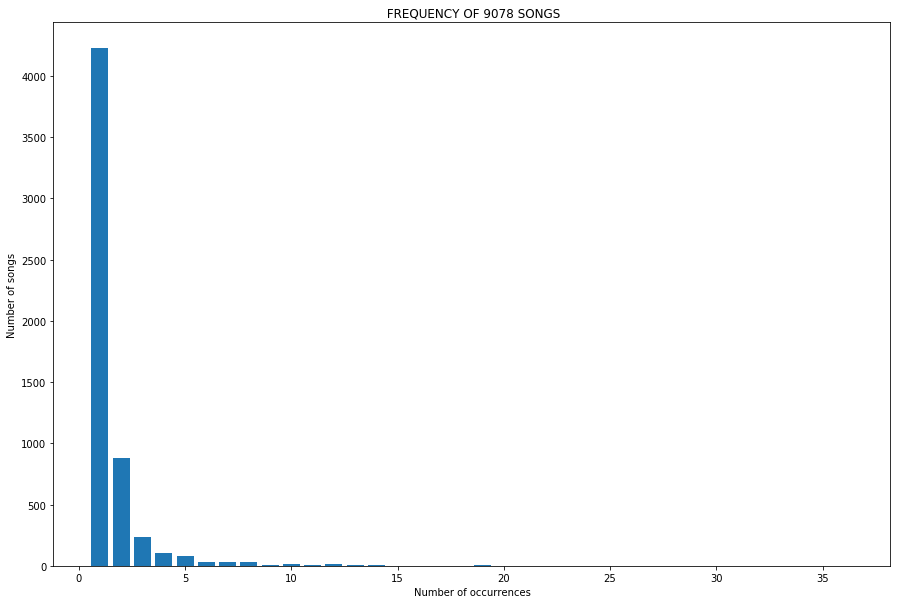

In [19]:
from collections import Counter
print("Top 5 most common songs : ".upper())
for item in Counter(list_titles).most_common(5):
  print(*item)
title_count = Counter(Counter(list_titles).values())
plt.figure(figsize=(15,10))
plt.title(" FREQUENCY OF {} SONGS".format(len(list_titles)))
plt.bar(title_count.keys(),title_count.values())
plt.xlabel("Number of occurrences")
plt.ylabel("Number of songs")
plt.show()

TOP 5 MOST POPULAR ARTISTS : 
Hoàng Minh Thắng 147
Vũ Hoàng, Thạch Thảo 120
Hương Ngọc Vân 111
Thích Trung Đạt 100
Trường Kha 98


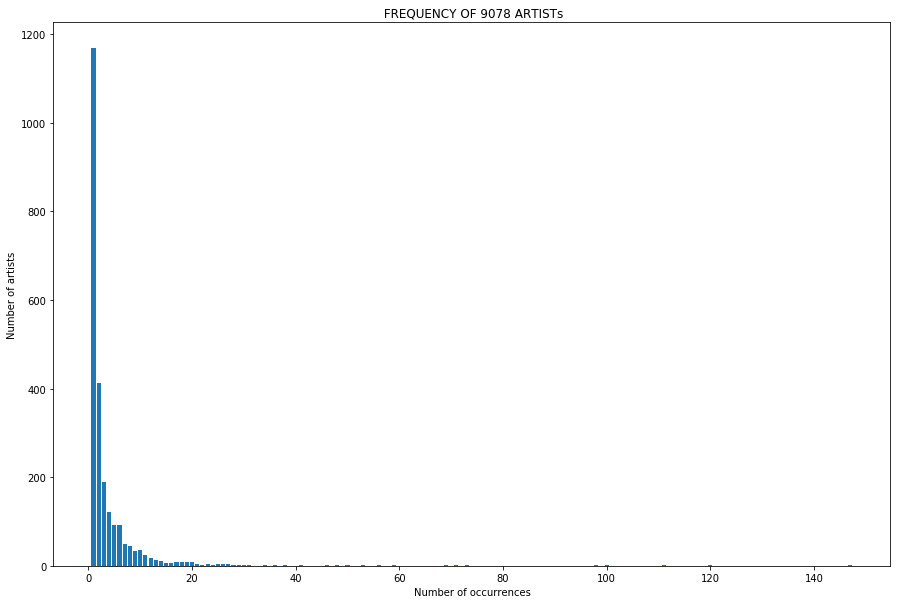

In [20]:
print("Top 5 most popular artists : ".upper())
for item in Counter(list_artists).most_common(5):
  print(*item)
title_count = Counter(Counter(list_artists).values())
plt.figure(figsize=(15,10))
plt.title(" FREQUENCY OF {} ARTISTs".format(len(list_artists)))
plt.bar(title_count.keys(),title_count.values())
plt.xlabel("Number of occurrences")
plt.ylabel("Number of artists")
plt.show()

TOP 10 MOST POPULAR COMPOSERS : 
Nhạc Ngoại Lời Việt 178
Nhiều Nhạc Sĩ 163
Thanh Sơn 161
Lam Phương 136
Nhạc Hoa Lời Việt 122
Trúc Phương 111
Trần Thiện Thanh 89
Hoài An 80
Vinh Sử 78
DC Tâm 77


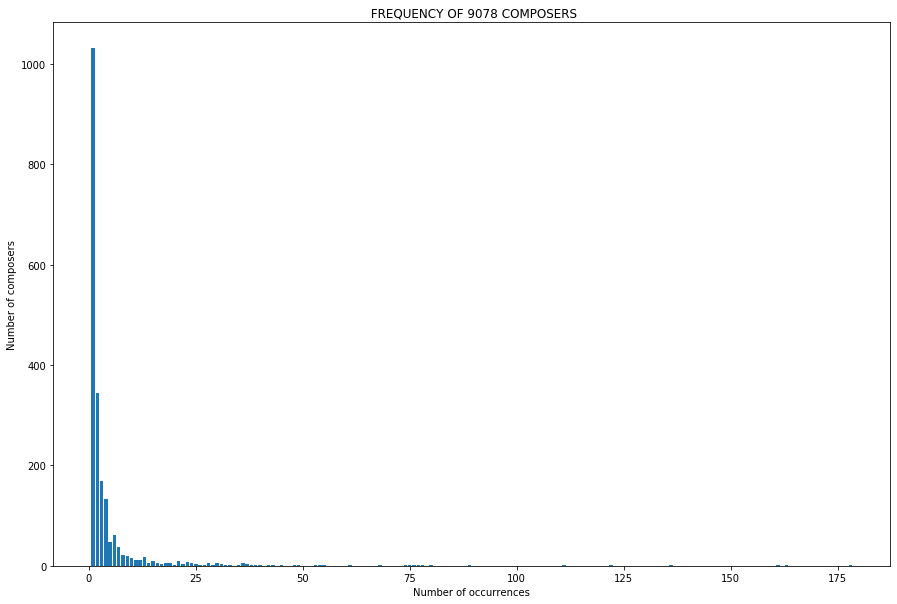

In [21]:
print("Top 10 most popular composers : ".upper())
for item in Counter(list_composers).most_common(10):
  print(*item)
title_count = Counter(Counter(list_composers).values())
plt.figure(figsize=(15,10))
plt.title(" FREQUENCY OF {} COMPOSERS".format(len(list_composers)))
plt.bar(title_count.keys(),title_count.values())
plt.xlabel("Number of occurrences")
plt.ylabel("Number of composers")
plt.show()

In [22]:
title=[]
for i in train_info["title"]:
  for j in [extract_text(i)]:
      title.append(j)
print("Number of titles: ", len(title))
title=list(set(title))
print("Number of different titles: ", len(title))

Number of titles:  9078
Number of different titles:  5694


In [23]:
composer=[]
for i in train_info["composers_id"]:
  for j in extract_num(i):
      composer.append(j)
print("Number of composers: ", len(composer))
composer=list(set(composer))
print("Number of different composers: ", len(composer))

Number of composers:  10007
Number of different composers:  2101


In [24]:
artist=[]
for i in train_info["artist_id"]:
  for j in extract_num(i):
     artist.append(j)
print("Number of artists: ", len(artist))
artist=list(set(artist))
print("Number of different artists: ", len(artist))

Number of artists:  11033
Number of different artists:  2153


In [0]:
# convert list to index
def to_id(list_):
  return {j:i for i,j in enumerate(list_)}

In [0]:
title2id=to_id(title)

In [0]:
composer2id=to_id(composer)

In [0]:
artist2id=to_id(artist)

In [0]:
# PREPARE DATA
# Represent tiltes, singers, artist, composer as one-hot vector
X_data=[]
for index, song in train_info.iterrows():
  title_mat=np.zeros(len(title))
  for l in [extract_text(song["title"])]:
    title_mat[title2id[l]]+=1

  composer_mat=np.zeros(len(composer))
  for i in extract_num(song["composers_id"]):
    composer_mat[composer2id[i]]+=1

  artist_mat=np.zeros(len(artist)) 
  for j in extract_num(song["artist_id"]):
    artist_mat[artist2id[j]]+=1
  
  time_mat=[]
  for k in extract_num(song["release_time"]):
    time_mat.append((float(k)))
  time_mat=np.array(time_mat)   
# Then concatenate these vectors together
  mat=np.concatenate((title_mat,composer_mat,artist_mat,time_mat),axis=0)
  
  X_data.append(mat)

y_data=list(train_info["label"])

In [27]:
print( len( X_data), len( y_data))

9078 9078


In [0]:
# Try some classic sklearn classifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn import metrics

def classifier( classifier,X_data,y_data,test_size):
  X_train, X_val, y_train, y_val = train_test_split( X_data, y_data, test_size=test_size, random_state=42)
  classifier.fit( X_train, y_train)
  val_pred = classifier.predict(X_val)
  print(" Using the {} classifier ".format( classifier.__class__))
  print(" Validation loss: ", np.sqrt( mse( val_pred, y_val)))

In [0]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier( n_estimators=200, max_depth=12, random_state=42)

In [35]:
# Compare
for i in [MultinomialNB(),BernoulliNB(),LogisticRegression(),Random_forest]:
  classifier(i,X_data,y_data,test_size=0.05)

 Using the <class 'sklearn.naive_bayes.MultinomialNB'> classifier 
 Validation loss:  2.6390827401298167
 Using the <class 'sklearn.naive_bayes.BernoulliNB'> classifier 
 Validation loss:  2.5512370671278717


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 Using the <class 'sklearn.linear_model.logistic.LogisticRegression'> classifier 
 Validation loss:  2.365780272882389
 Using the <class 'sklearn.ensemble.forest.RandomForestClassifier'> classifier 
 Validation loss:  3.1528603892911646


In [0]:
# PREPARE DATA
# Represent tiltes, singers, artist, composer as one-hot vector
X_test=[]
for index, song in test_info.iterrows():
  title_mat=np.zeros(len(title))
  for l in [extract_text(song["title"]).strip()]:
    try:   
      title_mat[title2id[l]]+=1  
    except:
      pass
  composer_mat=np.zeros(len(composer))
  for i in extract_num(song["composers_id"]):
    try:
      composer_mat[composer2id[i]]+=1
    except:
      pass
  artist_mat=np.zeros(len(artist))
  for j in extract_num(song["artist_id"]):
    try: 
      artist_mat[artist2id[j]]+=1
    except:
      pass
  time_mat=[]
  for k in extract_num(song["release_time"]):
    time_mat.append((float(k)))
  
  time_mat=np.array(time_mat)        
# Then concatenate these vectors together 
  mat=np.concatenate((title_mat,composer_mat,artist_mat,time_mat),axis=0)
  X_test.append(mat)

In [40]:
#predict
clf=LogisticRegression()
clf.fit(X_data,y_data)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
# Save to csv file for submission
x_id=test_info["ID"]
submit=pd.DataFrame({"ID":x_id,"pred":y_pred})
submit.to_csv("Phan_Viet_Hoang.csv",header=False,index=False)

In [44]:
import keras

Using TensorFlow backend.


In [0]:
X_data=[]

for index, song in train_info.iterrows():
  title_mat=np.zeros(len(title))
  artist_mat=np.zeros(len(artist))  
  composer_mat=np.zeros(len(composer))
  for i in [extract_text(song["title"])]:
    title_mat[title2id[i]]+=1
  for i in extract_num(song["composers_id"]):
    composer_mat[composer2id[i]]+=1
  artist_mat=np.zeros(len(artist))
  for j in extract_num(song["artist_id"]):
    artist_mat[artist2id[j]]+=1
  time_mat=[]
  for k in extract_num(song["release_time"]):
    time_mat.append((float(k)))
  time_mat=np.array(time_mat)   
  mat=np.concatenate((title_mat,composer_mat,artist_mat,time_mat),axis=0)
  X_data.append(mat)
y_data=[i-1 for i in train_info["label"]]

Now, we will try to build a neural network with Keras framework

In [0]:
X_data=np.asarray(X_data)
y_data = keras.utils.to_categorical(y_data)

In [47]:
print(X_data.shape,y_data.shape)

(9078, 9954) (9078, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,RepeatVector
from keras import optimizers
model=Sequential()
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(RepeatVector(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])


In [59]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X_data,y_data,test_size=5/100,random_state=42)
print(len(X_train_full),len(X_test))

8624 454


In [60]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=5/95,random_state=42)
print(len(X_train),len(X_valid))

8170 454


In [61]:
model.fit(X_train, y_train,batch_size=128,epochs=10,verbose= True,validation_data=(X_valid, y_valid))

Train on 8170 samples, validate on 454 samples
Epoch 1/10
8170/8170 [==============================] - 2s 195us/step - loss: 2.4400 - acc: 0.1563 - val_loss: 2.8241 - val_acc: 0.2026
Epoch 2/10
8170/8170 [==============================] - 1s 115us/step - loss: 1.6674 - acc: 0.4601 - val_loss: 3.6223 - val_acc: 0.2335
Epoch 3/10
8170/8170 [==============================] - 1s 112us/step - loss: 1.0789 - acc: 0.6749 - val_loss: 4.3775 - val_acc: 0.2423
Epoch 4/10
8170/8170 [==============================] - 1s 113us/step - loss: 0.6902 - acc: 0.7906 - val_loss: 5.1168 - val_acc: 0.2423
Epoch 5/10
8170/8170 [==============================] - 1s 121us/step - loss: 0.5170 - acc: 0.8319 - val_loss: 5.8042 - val_acc: 0.2335
Epoch 6/10
8170/8170 [==============================] - 1s 114us/step - loss: 0.4336 - acc: 0.8491 - val_loss: 6.1062 - val_acc: 0.2291
Epoch 7/10
8170/8170 [==============================] - 1s 114us/step - loss: 0.3813 - acc: 0.8623 - val_loss: 6.1995 - val_acc: 0.2401
E

In [0]:
y_pred=model.predict(X_test)

In [0]:
y_test=[i.argmax() for i in list(y_test)]
y_pred=[i.argmax() for i in list(y_pred)]

In [64]:
print("Test loss: ", np.sqrt(mse(y_test, y_pred)))

Test loss:  2.8132004756681597


In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 9954)              39816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                318560    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 4, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 360,178
Trainable params: 340,014
Non-trainable params: 20,164
___________________________________________